In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sys
import matplotlib.ticker as ticker
sns.set_theme(style="whitegrid", font_scale=1.1)

sys.path.append("../EDA")
DATA_PATH = "../instruction/movieReplicationSet.csv"
ALPHA = 0.005

import movie_data_formatter as mdf
import movie_rating_popularity_year as mrpy
import movie_rating_gender as mrgy
import general_functions as gf

df = pd.read_csv(DATA_PATH)
df = mdf.clean_data(df)
processed_data = mdf.convert_to_table(df)
processed_data = mrgy.reformat_gender_identity(processed_data)


In [2]:
processed_data.head()

,report_id,movie_name,rating,year,tends_to_find_fault_with_others,does_a_thorough_job,is_depressedblue,is_originalcomes_up_with_new_ideas,is_reserved,is_helpful_and_unselfish_with_others,...,i_like_to_be_surprised_even_if_it_startles_or_scares_me,have_you_ever_parachuted,i_enjoy_haunted_houses,i_had_a_sheltered_upbringing,my_life_is_very_stressful,i_value_my_life_to_be_well_ordered_and_predictable,have_you_ridden_a_motorcycle,have_you_gambled_or_bet_for_money,have_you_ever_been_skydiving,is_talkative
0,1.0,The Life of David Gale,NaN,2003,2.0,NaN,4.0,4.0,5.0,2.0,...,5.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0,1.0,1.0
1,1.0,Wing Commander,NaN,1999,2.0,NaN,4.0,4.0,5.0,2.0,...,5.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0,1.0,1.0
2,1.0,Django Unchained,4.0,2012,2.0,NaN,4.0,4.0,5.0,2.0,...,5.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0,1.0,1.0
3,1.0,Alien,NaN,1979,2.0,NaN,4.0,4.0,5.0,2.0,...,5.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0,1.0,1.0
4,1.0,Indiana Jones and the Last Crusade,3.0,1989,2.0,NaN,4.0,4.0,5.0,2.0,...,5.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0,1.0,1.0


In [3]:
# count number of movies with at least one review
grouped = processed_data.groupby(['movie_name', 'year']).filter(lambda x: len(x) >= 1)
print(f"Number of movies with at least one review: {grouped['movie_name'].nunique()}")

Number of movies with at least one review: 400


In [4]:
# analyze missingness of ratings
g_na = processed_data.groupby('report_id')['rating'].agg(
    na_count   = lambda s: s.isna().sum(),
    total_count= 'size'
)
g_na.describe()

,na_count,total_count
count,1097.000000,1097.0
mean,297.708295,400.0
std,75.980457,0.0
min,0.000000,400.0
25%,279.000000,400.0
50%,319.000000,400.0
75%,345.000000,400.0
max,400.000000,400.0


In [5]:
# statistics on non-NA ratings per movie
na_free_data = processed_data.dropna(subset=['rating'])
g = na_free_data.groupby('report_id').agg(
    rating_mean=('rating','mean'),
    rating_count=('rating','size'),
    rating_std=('rating','std')
)
g.describe()


,rating_mean,rating_count,rating_std
count,1096.000000,1096.000000,1096.000000
mean,2.955765,102.385036,0.837096
std,0.480793,75.952205,0.258969
min,0.334586,2.000000,0.000000
25%,2.700000,55.000000,0.655797
50%,3.004832,81.000000,0.825395
75%,3.285714,121.000000,1.008793
max,4.000000,400.000000,1.783398


/var/folders/9t/kz_xx0px1mxf1wqtzvvb57fc0000gn/T/ipykernel_32623/729963754.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=ax, palette='grey', edgecolor='black')
/var/folders/9t/kz_xx0px1mxf1wqtzvvb57fc0000gn/T/ipykernel_32623/729963754.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=ax, palette='grey', edgecolor='black')
/var/folders/9t/kz_xx0px1mxf1wqtzvvb57fc0000gn/T/ipykernel_32623/729963754.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.inde

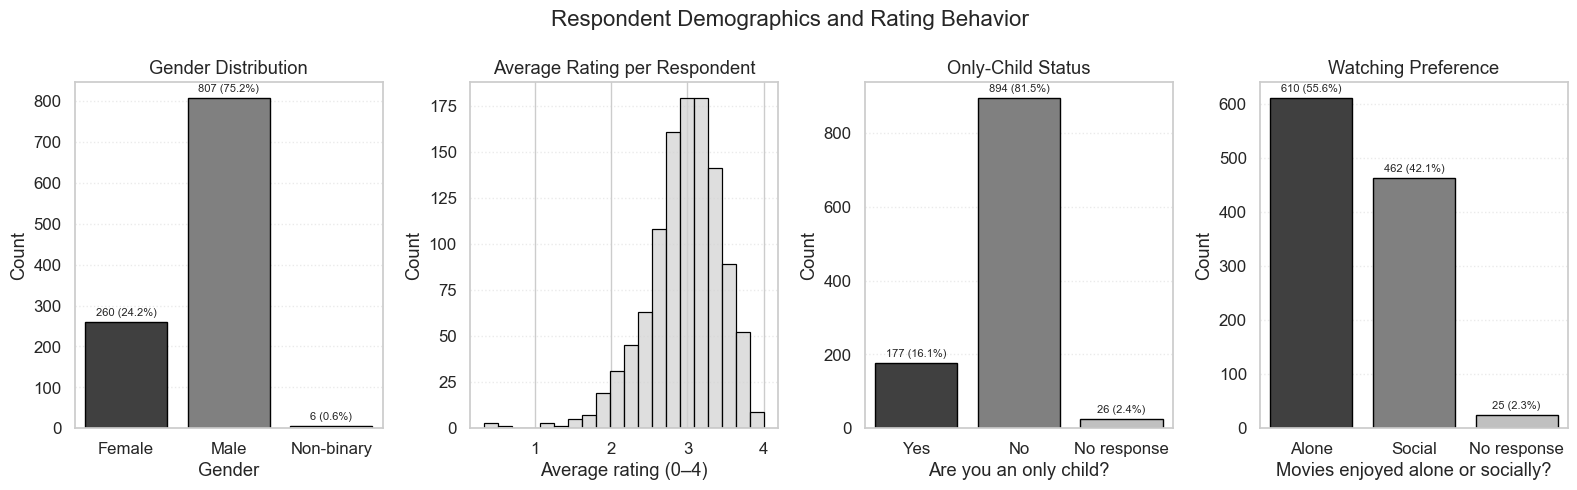

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---------- Label maps (numeric -> readable) ----------
child_map  = {1:'Yes', 0:'No', -1:'No response'}
alone_map  = {1:'Alone', 0:'Social', -1:'No response'}

gender_order = ['Female','Male','Non-binary']
child_order  = ['Yes','No','No response']
alone_order  = ['Alone','Social','No response']

# ---------- Per-respondent summary ----------
grouped_counts = (
    processed_data
    .groupby('report_id')
    .agg(
        n_presented = ('rating','size'),   # rows present (often 400/movie entries)
        n_rated     = ('rating','count'),  # non-NA ratings
        avg_rating  = ('rating','mean'),
        std_rating  = ('rating','std'),
        n_movies    = ('movie_name','nunique'),
        gender_code = ('gender_identity','first'),
        child_code  = ('are_you_an_only_child','first'),
        alone_code  = ('movies_are_best_enjoyed_alone','first')
    )
    .reset_index()
)

# Map to labels + set categorical order
grouped_counts['gender'] = pd.Categorical(grouped_counts['gender_code'])
grouped_counts['only_child'] = pd.Categorical(grouped_counts['child_code'].map(child_map),
                                              categories=child_order, ordered=True)
grouped_counts['watch_pref'] = pd.Categorical(grouped_counts['alone_code'].map(alone_map),
                                              categories=alone_order, ordered=True)

# ---------- Helper: barplot with count + % annotations ----------
def bar_with_annotations(ax, series, order, title, xlabel):
    counts = series.value_counts(dropna=False).reindex(order, fill_value=0)
    total  = counts.sum()
    sns.barplot(x=counts.index, y=counts.values, ax=ax, palette='grey', edgecolor='black')
    ax.set_title(title); ax.set_xlabel(xlabel); ax.set_ylabel('Count')
    ax.grid(axis='y', linestyle=':', alpha=0.4); ax.set_axisbelow(True)
    for patch, v in zip(ax.patches, counts.values):
        ax.annotate(f'{int(v):,} ({v/total:.1%})',
                    (patch.get_x()+patch.get_width()/2, patch.get_height()),
                    ha='center', va='bottom', fontsize=8, xytext=(0,3), textcoords='offset points')

# ---------- Plots ----------
fig, axs = plt.subplots(1, 4, figsize=(16, 5))

# insert title for the entire figure
fig.suptitle('Respondent Demographics and Rating Behavior', fontsize=16)

# 1) Gender distribution
bar_with_annotations(axs[0], grouped_counts['gender'], gender_order,
                     'Gender Distribution', 'Gender')

# 2) Average rating distribution (only those with at least 1 rating)
sns.histplot(grouped_counts.loc[grouped_counts['n_rated']>0, 'avg_rating'],
             bins=20, ax=axs[1],  edgecolor='black', color='lightgrey')
axs[1].set_title('Average Rating per Respondent'); axs[1].set_xlabel('Average rating (0–4)')
axs[1].grid(axis='y', linestyle=':', alpha=0.4); axs[1].set_axisbelow(True)

# 3) Only-child distribution
bar_with_annotations(axs[2], grouped_counts['only_child'], child_order,
                     'Only-Child Status', 'Are you an only child?')

# 4) Watching preference distribution
bar_with_annotations(axs[3], grouped_counts['watch_pref'], alone_order,
                     'Watching Preference', 'Movies enjoyed alone or socially?')


plt.tight_layout(); plt.show()


# save as png figure
fig.savefig('../figures/respondent_demographics_and_rating_behavior.pdf', bbox_inches='tight')





In [7]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
from itertools import combinations

# group data to have one row per (report_id, movie_name)
# unstack to wide format, so that each column is a movie and each row is a participant
df_ratings = processed_data.groupby(['report_id', 'movie_name'])\
    ['rating'].first().unstack(level='movie_name') 

pair_results = []

# iterate over all unique participant pairs (i, j)
# we compute Spearman correlation only on jointly rated movies
# movies that either participant did not rate are excluded
for i, j in combinations(df_ratings.index, 2):
    r1 = df_ratings.loc[i]
    r2 = df_ratings.loc[j]

    # Only keep jointly rated movies
    # additionally, require at least 10 
    # jointly rated movies for stability
    mask = r1.notna() & r2.notna()
    if mask.sum() >= 10:
        rho, p = spearmanr(r1[mask], r2[mask])
        pair_results.append((i, j, rho, p))

# Convert to DataFrame
# columns: id_i, id_j, rho, p_value
spearman_df = pd.DataFrame(pair_results, columns=['id_i', 'id_j', 'rho', 'p_value'])

# Summary statistics
print(f"Total valid pairs: {len(spearman_df)}")
print(f"Mean Spearman correlation: {spearman_df['rho'].mean():.3f}")
print(f"Median Spearman correlation: {spearman_df['rho'].median():.3f}")



/var/folders/9t/kz_xx0px1mxf1wqtzvvb57fc0000gn/T/ipykernel_32623/3332865338.py:25: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, p = spearmanr(r1[mask], r2[mask])


Total valid pairs: 577691
Mean Spearman correlation: 0.109
Median Spearman correlation: 0.113


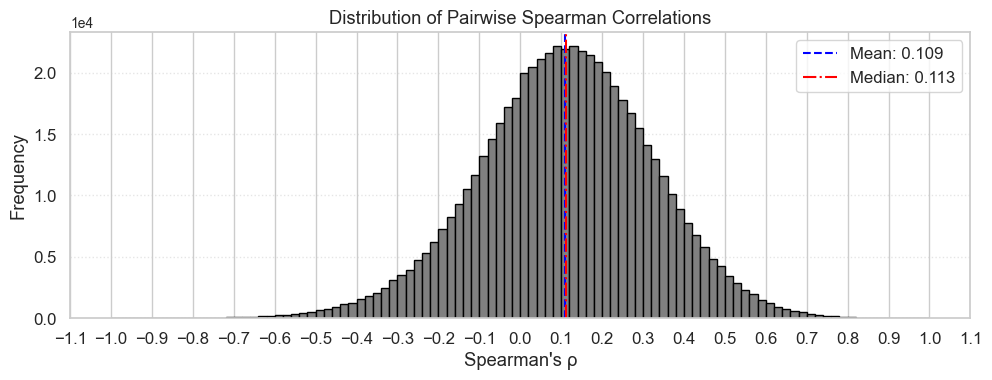

In [8]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Histogram of pairwise Spearman correlations
fig, ax = plt.subplots(figsize=(10, 4))
ax.hist(spearman_df['rho'], bins=100, color='grey', edgecolor='black')

ax.set_xlabel("Spearman's ρ")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of Pairwise Spearman Correlations")

# Scientific notation on y-axis (e.g., 1.2 × 10^5)
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax.yaxis.get_offset_text().set_fontsize(10)  # exponent label size
ax.grid(axis='y', linestyle=':', alpha=0.5)
fig.tight_layout()

# add mean and median lines
mean_rho = spearman_df['rho'].mean()
median_rho = spearman_df['rho'].median()
ax.axvline(mean_rho, color='blue', linestyle='--', label=f'Mean: {mean_rho:.3f}')
ax.axvline(median_rho, color='red', linestyle='-.', label=f'Median: {median_rho:.3f}')
ax.legend()

# increment the x-axis ticks by 0.1
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))


fig.savefig('../figures/pairwise_spearman_correlation_distribution.pdf', bbox_inches='tight')
plt.show()


In [9]:
# distribution of number of joint ratings reported and frequency of spearman correlations

joint_counts = []
for i, j in combinations(df_ratings.index, 2):
    r1 = df_ratings.loc[i]
    r2 = df_ratings.loc[j]

    # Only keep jointly rated movies
    mask = r1.notna() & r2.notna()
    joint_counts.append(mask.sum())


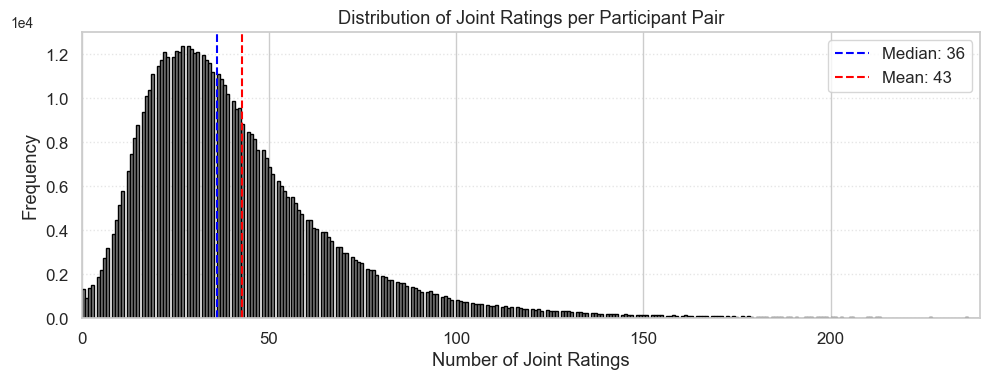

Total valid pairs: 577691
Mean Spearman's ρ: 0.109
Median Spearman's ρ: 0.113
Standard deviation of Spearman's ρ: 0.213


,id_i,id_j,rho,p_value
count,577691.000000,577691.000000,575548.000000,575548.000000
mean,368.529226,734.290022,0.109372,0.388571
std,258.704708,257.722519,0.213318,0.308638
min,1.000000,2.000000,-1.000000,0.000000
25%,149.000000,552.000000,-0.027276,0.098912
50%,326.000000,778.000000,0.112849,0.335332
75%,552.000000,953.000000,0.252029,0.649377
max,1096.000000,1097.000000,1.000000,1.000000


In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 4))
plt.hist(joint_counts, bins=500, color='grey', edgecolor='black')

plt.xlabel("Number of Joint Ratings")
plt.ylabel("Frequency")
plt.title("Distribution of Joint Ratings per Participant Pair")

# --- format y-axis ---
ax = plt.gca()
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))  # scientific notation
ax.yaxis.get_offset_text().set_fontsize(10)                   # smaller exponent label
ax.yaxis.offsetText.set_position((-0.08, 0))                  # adjust exponent position

# add vertical line at the median and mean 
median_joint = np.median(joint_counts)
mean_joint   = np.mean(joint_counts)
plt.axvline(median_joint, color='blue', linestyle='--', label=f'Median: {median_joint:.0f}')
plt.axvline(mean_joint, color='red', linestyle='--', label=f'Mean: {mean_joint:.0f}')
plt.legend()

# -- format x-axis ---
# only from 0 to 240 
ax.set_xlim(0, 240)


# Optional cosmetic improvements
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.tight_layout()

# save figure
plt.savefig('../figures/joint_ratings_distribution.pdf', bbox_inches='tight')
plt.show()

# Summary statistics
print(f"Total valid pairs: {len(spearman_df)}")
print(f"Mean Spearman's ρ: {spearman_df['rho'].mean():.3f}")
print(f"Median Spearman's ρ: {spearman_df['rho'].median():.3f}")
print(f"Standard deviation of Spearman's ρ: {spearman_df['rho'].std():.3f}")

spearman_df.describe()

# joint_counts_series = pd.Series(joint_counts)
# joint_counts_series.describe()
